***Practica 3: Redes Neuronales y Deep Learning***
Parte A: Perceptrón multicapa

Para este proyecto se requiere la librería Scikit-Learn, que ya se encuentra instalada en el entorno del alumno.

En caso de ser necesario se puede instalar usando la siguiente celda de código.

In [ ]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 538.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------------ --------------------- 5.1/11.1 MB 109.2 MB/s eta 0:00:01
   -------------------------------- ------- 9.0/11.1 MB 115.1 MB/s eta 0:00:01
   ---------------------------------------  11.1/11.1 MB 108.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 72.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   --------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
   --


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\danid\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 2.2 MB/s eta 0:00:06
   --------------- ------------------------ 4.5/11.6 MB 47.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.8/11.6 MB 69.6 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 110.0 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 81.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/509.2 kB ? eta -:--:--
   --------------------------------------- 509.2/509.2 kB 31.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/347.8 kB ? eta -:--:--
   --------------------------------------- 347.8/347.8 kB 21.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\danid\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Función para generar datos aleatorios
def generar_datos(n_puntos=1000, seed=42):
    np.random.seed(seed)
    presion_arterial = np.random.uniform(80, 180, n_puntos)
    colesterol = np.random.uniform(150, 300, n_puntos)
    data = np.column_stack((presion_arterial, colesterol))
    return data

# Función para calcular el riesgo cardiovascular
def calcular_riesgo(data):
    riesgo = []
    for presion, colesterol in data:
        if presion > 140 or colesterol > 240:
            riesgo.append(1)  # Riesgo alto
        else:
            riesgo.append(0)  # Riesgo bajo
    return np.array(riesgo)

# Generar datos y calcular el riesgo
data = generar_datos()
riesgo = calcular_riesgo(data)


C:\Users\danid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


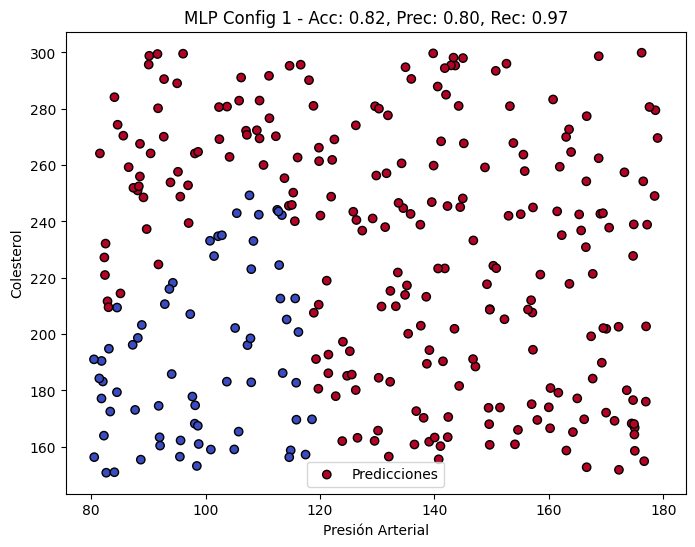

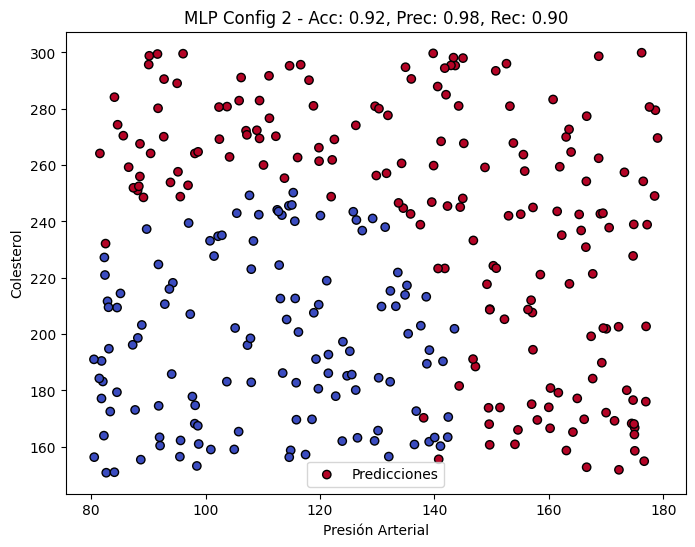

Resultados de la Configuración 1:
Precisión: 0.82, Precisión: 0.80, Recall: 0.97
Resultados de la Configuración 2:
Precisión: 0.92, Precisión: 0.98, Recall: 0.90
La Configuración 2 tiene mejor precisión.


In [10]:
# Dividir los datos en entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(data, riesgo, test_size=0.3, random_state=42)

# Configuración 1: Red neuronal con menos neuronas
mlp1 = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp1.fit(X_train, y_train)

# Evaluación de la configuración 1
y_pred1 = mlp1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)

# Configuración 2: Red neuronal con más neuronas
mlp2 = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp2.fit(X_train, y_train)

# Evaluación de la configuración 2
y_pred2 = mlp2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)

# Función para graficar los resultados
def plot_results(X, y, model, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), cmap='coolwarm', marker='o', edgecolor='k', label='Predicciones')
    plt.xlabel('Presión Arterial')
    plt.ylabel('Colesterol')
    plt.title(title)
    plt.legend()
    plt.show()

# Graficar resultados de ambas configuraciones
plot_results(X_test, y_test, mlp1, f'MLP Config 1 - Acc: {accuracy1:.2f}, Prec: {precision1:.2f}, Rec: {recall1:.2f}')
plot_results(X_test, y_test, mlp2, f'MLP Config 2 - Acc: {accuracy2:.2f}, Prec: {precision2:.2f}, Rec: {recall2:.2f}')

# Comparación de configuraciones
print("Resultados de la Configuración 1:")
print(f"Precisión: {accuracy1:.2f}, Precisión: {precision1:.2f}, Recall: {recall1:.2f}")
print("Resultados de la Configuración 2:")
print(f"Precisión: {accuracy2:.2f}, Precisión: {precision2:.2f}, Recall: {recall2:.2f}")

# Discusión de resultados
if accuracy1 > accuracy2:
    print("La Configuración 1 tiene mejor precisión.")
else:
    print("La Configuración 2 tiene mejor precisión.")